In [52]:
library(rvest)
library(ggplot2)
library(ggthemes)
library(dplyr)
require(gridExtra)
#options(repr.plot.width=800, repr.plot.height=500)

Scrape html table from wikipedia

In [127]:
url <- "https://en.wikipedia.org/wiki/World_Happiness_Report"

In [128]:
data <- url %>% read_html() %>% html_nodes(xpath='//*[@id="mw-content-text"]/div/table') %>%
html_table(fill=TRUE)

In [129]:
data <- data[[1]]

In [131]:
dim(data); head(data)

[1] 156   9

Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343


In [267]:
hap1 <- hap %>% top_n(20, wt = Score) %>%  
  arrange(desc(Score))

hap1[,2] <- factor(hap1[,2], levels = hap1[,2][order(hap$Score)])
hap1


Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [305]:
options(repr.plot.width=4, repr.plot.height=3)

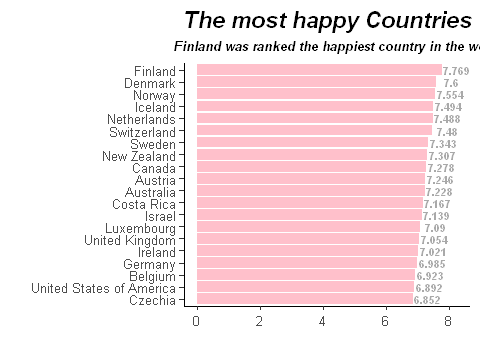

In [306]:
p1 <- ggplot(hap1, aes(hap1[,2], Score), Score) +
        geom_bar(stat = "identity", fill = "pink") + 
        theme_classic()+coord_flip() +
        geom_text(aes(label = (Score)), size = 2.3, color = "darkgrey",
                  fontface = 'bold', nudge_y = 0.5) +
       ggtitle("Hospital charges by State") +
       xlab("") + ylab("")+ labs(title = "The most happy Countries",
    subtitle = " Finland was ranked the happiest country in the world twice in a row") +
theme(plot.title = element_text(hjust = 0.1, color="black", size=14, face="bold.italic"), plot.subtitle = element_text(hjust = 0.1, size=8, color = "black", face = "bold.italic"),
     axis.text = element_text(size = 8))
      
p1

In [307]:
sad1 <- hap %>% top_n(-20, wt = Score) %>%  
  arrange((Score))

sad1[,2] <- factor(sad1[,2], levels = sad1[,2][order(hap$Score)])
sad1


Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091
155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
151,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077
150,Malawi,3.410,0.191,0.560,0.495,0.443,0.218,0.089
149,Syria,3.462,0.619,0.378,0.440,0.013,0.331,0.141
148,Botswana,3.488,1.041,1.145,0.538,0.455,0.025,0.100
147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110


In [309]:
options(repr.plot.width=4, repr.plot.height=3)

In [314]:
install.packages("ggflags")

Warning message:
"package 'ggflags' is not available (for R version 3.6.1)"

In [315]:
library(ggflags)

ERROR: Error in library(ggflags): there is no package called 'ggflags'


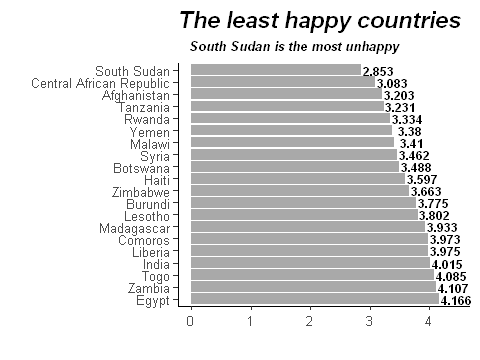

In [312]:
p2 <- ggplot(sad1, aes(sad1[,2], Score), Score) +
        geom_bar(stat = "identity",  fill = "darkgrey") + 
        theme_classic()+coord_flip() +
        geom_text(aes(label = (Score)), size = 2.5, color = "black",
                  fontface = 'bold', nudge_y = 0.3) +
       ggtitle("Hospital charges by State") +
       xlab("") + ylab("")+ labs(title = "The least happy countries",
    subtitle = " South Sudan is the most unhappy ") +
theme(plot.title = element_text(hjust = 0.1, color="black", size=14, face="bold.italic"), plot.subtitle = element_text(hjust = 0.1, size=8, color = "black", face = "bold.italic"),
     axis.text = element_text(size = 8))
      
p2

In [304]:
#grid.arrange(p1, p2, ncol=2)

Combine top10 Happy and Sad countries

In [289]:
both <- rbind(hap1, sad1)
both

Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [343]:
newdata <- both %>%
        arrange(Score) %>%
        mutate(abovebelow = mean(5, na.rm = TRUE),
               Ratio = ifelse(Score - abovebelow > 0, "Happy", "Unhappy"))%>%
             arrange(desc(abovebelow))
head(newdata, 20)

Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,abovebelow,Ratio
156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091,5,Unhappy
155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,5,Unhappy
154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,5,Unhappy
153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,5,Unhappy
152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,5,Unhappy
151,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077,5,Unhappy
150,Malawi,3.410,0.191,0.560,0.495,0.443,0.218,0.089,5,Unhappy
149,Syria,3.462,0.619,0.378,0.440,0.013,0.331,0.141,5,Unhappy
148,Botswana,3.488,1.041,1.145,0.538,0.455,0.025,0.100,5,Unhappy
147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110,5,Unhappy


In [344]:
#Sorting
both[,2] <- factor(both[,2], levels = both[,2][order(both$Score)])


In [408]:
options(repr.plot.width=7, repr.plot.height=7)

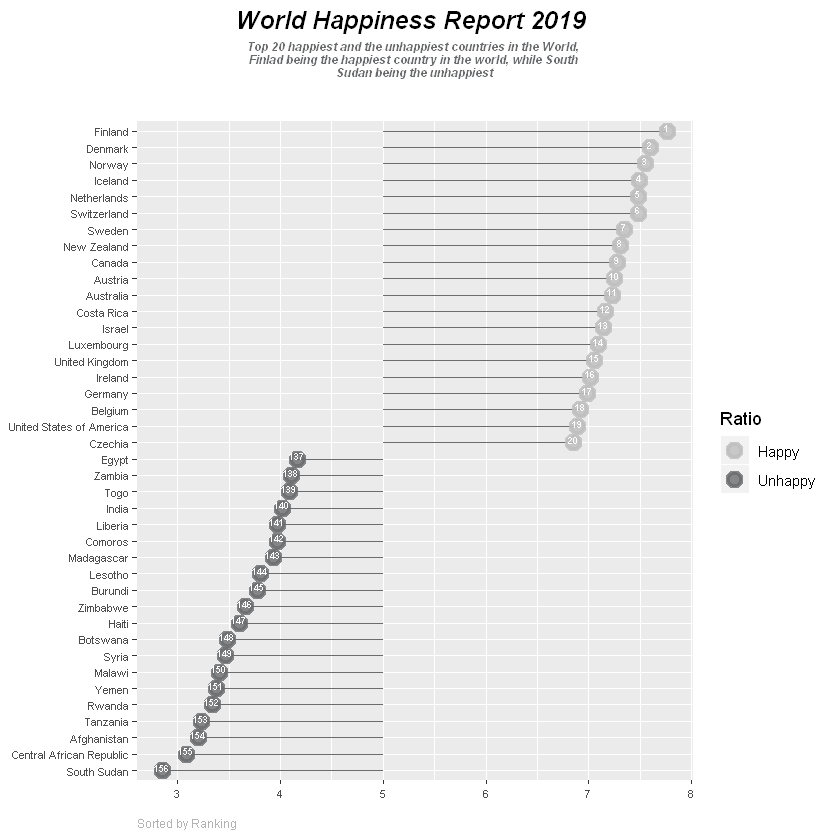

In [416]:
happysad <- ggplot(newdata, aes(Score, newdata[,2], color = Ratio)) +
        geom_segment(aes(x = abovebelow, y = newdata[,2], xend = Score, yend = newdata[,2]), color = "#6A6C6E") +
        geom_point(size = 5, alpha=0.8, shape=20, stroke=2)+ 
        geom_text(aes(label = (newdata[,1])), size = 2, color = "white",
                  fontface = 'bold', nudge_y = 0.2) +
        scale_color_manual(values=c("grey","#6A6C6E"))+
        labs(title = "              World Happiness Report 2019", subtitle = "Top 20 happiest and the unhappiest countries in the World, \nFinlad being the happiest country in the world, while South \nSudan being the unhappiest",
             caption = "Sorted by Ranking")+
        
        theme_gray() + 
        theme(plot.title = element_text(color="black", size=15, face="bold.italic"), plot.subtitle = element_text(hjust = 0.5, size=7.2, face="bold.italic", color = "#6A6C6E", margin = margin(b = 25, l = -25)), plot.caption = element_text(size = 7, margin = margin(t = 10), color = "grey70", hjust = 0))+
        theme(axis.title = element_blank(), axis.text = element_text(size = 6.7)) 
happysad

In [ ]:
ggbarplot(dfm, x = "name", y = "mpg_z",
          fill = "mpg_grp",           # change fill color by mpg_level
          color = "white",            # Set bar border colors to white
          palette = "jco",            # jco journal color palett. see ?ggpar
          sort.val = "desc",          # Sort the value in descending order
          sort.by.groups = FALSE,     # Don't sort inside each group
          x.text.angle = 90,          # Rotate vertically x axis texts
          ylab = "MPG z-score",
          legend.title = "MPG Group",
          rotate = TRUE,
          ggtheme = theme_minimal()
          )
